In [1]:
!pip install torch==1.9.1

     |████████████████████████████████| 831.4 MB 5.1 kB/s               | 527.7 MB 41.8 MB/s eta 0:00:08��███████████████████▍  | 764.6 MB 86.7 MB/s eta 0:00:01
  Attempting uninstall: torch
    Found existing installation: torch 1.10.0
    Uninstalling torch-1.10.0:
      Successfully uninstalled torch-1.10.0


# Urinary system diseases classification
#### Presumptive classification of nephritis from inflammation

This notebook aims to create a classification model for the dataset described in here https://www.kaggle.com/yamqwe/acute-inflammationse


```
Credit:
Jacek Czerniak, Ph.D., Assistant ProfessorSystems Research InstitutePolish Academy of SciencesLaboratory of Intelligent Systems ul. Newelska 6, Room 21801-447 Warszawa, Polande-mail:
jacek.czerniak '@' ibspan.waw.pl or jczerniak '@' ukw.edu.pl
```

In [2]:
import pandas as pd

In [3]:
data_file = 'data/diagnosis.data'
columns = ['Temperature of patient', 'Occurrence of nausea', 'Lumbar pain', 'Urine pushing (continuous need for urination)', 'Micturition pains', 'Burning of urethra, itch, swelling of urethra outlet', 'Inflammation of urinary bladder', 'Nephritis of renal pelvis origin']
data_df = pd.read_csv(filepath_or_buffer=data_file, sep='\t', header=None, names=columns, encoding='utf-16')
data_df.head()

Temperature of patient Occurrence of nausea Lumbar pain  \
0                   35,5                   no         yes   
1                   35,9                   no          no   
2                   35,9                   no         yes   
3                   36,0                   no          no   
4                   36,0                   no         yes   

  Urine pushing (continuous need for urination) Micturition pains  \
0                                            no                no   
1                                           yes               yes   
2                                            no                no   
3                                           yes               yes   
4                                            no                no   

  Burning of urethra, itch, swelling of urethra outlet  \
0                                                 no     
1                                                yes     
2                                                 no     
3                                                yes     
4                                                 no     

  Inflammation of urinary bladder Nephritis of renal pelvis origin  
0                              no                               no  
1                             yes                               no  
2                              no                               no  
3                             yes                               no  
4                              no                               no

## Feature engineering

### Drop missing values

In [4]:
data_df.shape

(120, 8)

In [5]:
data_df = data_df.dropna(axis=0)
data_df.shape

(120, 8)

There are no missing values

### Convert text to numbers

In [6]:
for c in columns[1:]:
    data_df.loc[data_df[c]=='no',c] = 0
    data_df.loc[data_df[c]=='yes',c] = 1
data_df.head()


Temperature of patient Occurrence of nausea Lumbar pain  \
0                   35,5                    0           1   
1                   35,9                    0           0   
2                   35,9                    0           1   
3                   36,0                    0           0   
4                   36,0                    0           1   

  Urine pushing (continuous need for urination) Micturition pains  \
0                                             0                 0   
1                                             1                 1   
2                                             0                 0   
3                                             1                 1   
4                                             0                 0   

  Burning of urethra, itch, swelling of urethra outlet  \
0                                                  0     
1                                                  1     
2                                                  0     
3                                                  1     
4                                                  0     

  Inflammation of urinary bladder Nephritis of renal pelvis origin  
0                               0                                0  
1                               1                                0  
2                               0                                0  
3                               1                                0  
4                               0                                0

### Create labels  

- Check if one patient can have both diseases

In [7]:
data_df[(data_df['Inflammation of urinary bladder'] == 1) & (data_df['Nephritis of renal pelvis origin'] == 1)].shape

(19, 8)

- Check if one patient don't have any disease

In [8]:
data_df[(data_df['Inflammation of urinary bladder'] == 0) & (data_df['Nephritis of renal pelvis origin'] == 0)].shape

(30, 8)

Create a Diagnosis column which will serve as our label. It can have values of
- 0 : if patient has no disease
- 1 : if patient was diagnosed with just "Nephritis of renal pelvis origin"
- 2 : if patient was diagnosed with just "Inflammation of urinary bladder"
- 3 : if patient was diagnosed with both diseases

In [9]:
import numpy as np

In [10]:
conditions = [
    ((data_df['Inflammation of urinary bladder'] ==
     0) & (data_df['Nephritis of renal pelvis origin'] == 0)),
    ((data_df['Inflammation of urinary bladder'] ==
     0) & (data_df['Nephritis of renal pelvis origin'] == 1)),
    ((data_df['Inflammation of urinary bladder'] ==
     1) & (data_df['Nephritis of renal pelvis origin'] == 0)),
    ((data_df['Inflammation of urinary bladder'] ==
     1) & (data_df['Nephritis of renal pelvis origin'] == 1))
]
values = [0, 1, 2, 3]
data_df['Diagnosis'] = np.select(conditions, values)
data_df.head()


Temperature of patient Occurrence of nausea Lumbar pain  \
0                   35,5                    0           1   
1                   35,9                    0           0   
2                   35,9                    0           1   
3                   36,0                    0           0   
4                   36,0                    0           1   

  Urine pushing (continuous need for urination) Micturition pains  \
0                                             0                 0   
1                                             1                 1   
2                                             0                 0   
3                                             1                 1   
4                                             0                 0   

  Burning of urethra, itch, swelling of urethra outlet  \
0                                                  0     
1                                                  1     
2                                                  0     
3                                                  1     
4                                                  0     

  Inflammation of urinary bladder Nephritis of renal pelvis origin  Diagnosis  
0                               0                                0          0  
1                               1                                0          2  
2                               0                                0          0  
3                               1                                0          2  
4                               0                                0          0

### Drop previous diagnosis columns

In [11]:
data_df = data_df.drop(['Inflammation of urinary bladder', 'Nephritis of renal pelvis origin'], axis=1)
data_df.head()

Temperature of patient Occurrence of nausea Lumbar pain  \
0                   35,5                    0           1   
1                   35,9                    0           0   
2                   35,9                    0           1   
3                   36,0                    0           0   
4                   36,0                    0           1   

  Urine pushing (continuous need for urination) Micturition pains  \
0                                             0                 0   
1                                             1                 1   
2                                             0                 0   
3                                             1                 1   
4                                             0                 0   

  Burning of urethra, itch, swelling of urethra outlet  Diagnosis  
0                                                  0            0  
1                                                  1            2  
2                                                  0            0  
3                                                  1            2  
4                                                  0            0

### Scale temperature

Convert temperature decimal character

In [12]:
data_df['Temperature of patient'] = data_df['Temperature of patient'].str.replace(',','.')
data_df.head()

Temperature of patient Occurrence of nausea Lumbar pain  \
0                   35.5                    0           1   
1                   35.9                    0           0   
2                   35.9                    0           1   
3                   36.0                    0           0   
4                   36.0                    0           1   

  Urine pushing (continuous need for urination) Micturition pains  \
0                                             0                 0   
1                                             1                 1   
2                                             0                 0   
3                                             1                 1   
4                                             0                 0   

  Burning of urethra, itch, swelling of urethra outlet  Diagnosis  
0                                                  0            0  
1                                                  1            2  
2                                                  0            0  
3                                                  1            2  
4                                                  0            0

In [13]:
data_df = data_df.astype({'Temperature of patient':'float',
        'Occurrence of nausea':'float',
        'Lumbar pain':'float',
        'Urine pushing (continuous need for urination)':'float',
        'Micturition pains':'float',
        'Burning of urethra, itch, swelling of urethra outlet':'float',
        'Diagnosis':'category',
})
data_df.dtypes

Temperature of patient                                   float64
Occurrence of nausea                                     float64
Lumbar pain                                              float64
Urine pushing (continuous need for urination)            float64
Micturition pains                                        float64
Burning of urethra, itch, swelling of urethra outlet     float64
Diagnosis                                               category
dtype: object

In [14]:
data_df: pd.DataFrame
data_df.describe(include='all')

Temperature of patient  Occurrence of nausea  Lumbar pain  \
count               120.000000            120.000000   120.000000   
unique                     NaN                   NaN          NaN   
top                        NaN                   NaN          NaN   
freq                       NaN                   NaN          NaN   
mean                 38.724167              0.241667     0.583333   
std                   1.819132              0.429888     0.495074   
min                  35.500000              0.000000     0.000000   
25%                  37.100000              0.000000     0.000000   
50%                  37.950000              0.000000     1.000000   
75%                  40.600000              0.000000     1.000000   
max                  41.500000              1.000000     1.000000   

        Urine pushing (continuous need for urination)  Micturition pains  \
count                                      120.000000         120.000000   
unique                                            NaN                NaN   
top                                               NaN                NaN   
freq                                              NaN                NaN   
mean                                         0.666667           0.491667   
std                                          0.473381           0.502027   
min                                          0.000000           0.000000   
25%                                          0.000000           0.000000   
50%                                          1.000000           0.000000   
75%                                          1.000000           1.000000   
max                                          1.000000           1.000000   

        Burning of urethra, itch, swelling of urethra outlet  Diagnosis  
count                                          120.000000         120.0  
unique                                                NaN           4.0  
top                                                   NaN           2.0  
freq                                                  NaN          40.0  
mean                                             0.416667           NaN  
std                                              0.495074           NaN  
min                                              0.000000           NaN  
25%                                              0.000000           NaN  
50%                                              0.000000           NaN  
75%                                              1.000000           NaN  
max                                              1.000000           NaN

### Data exploration

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

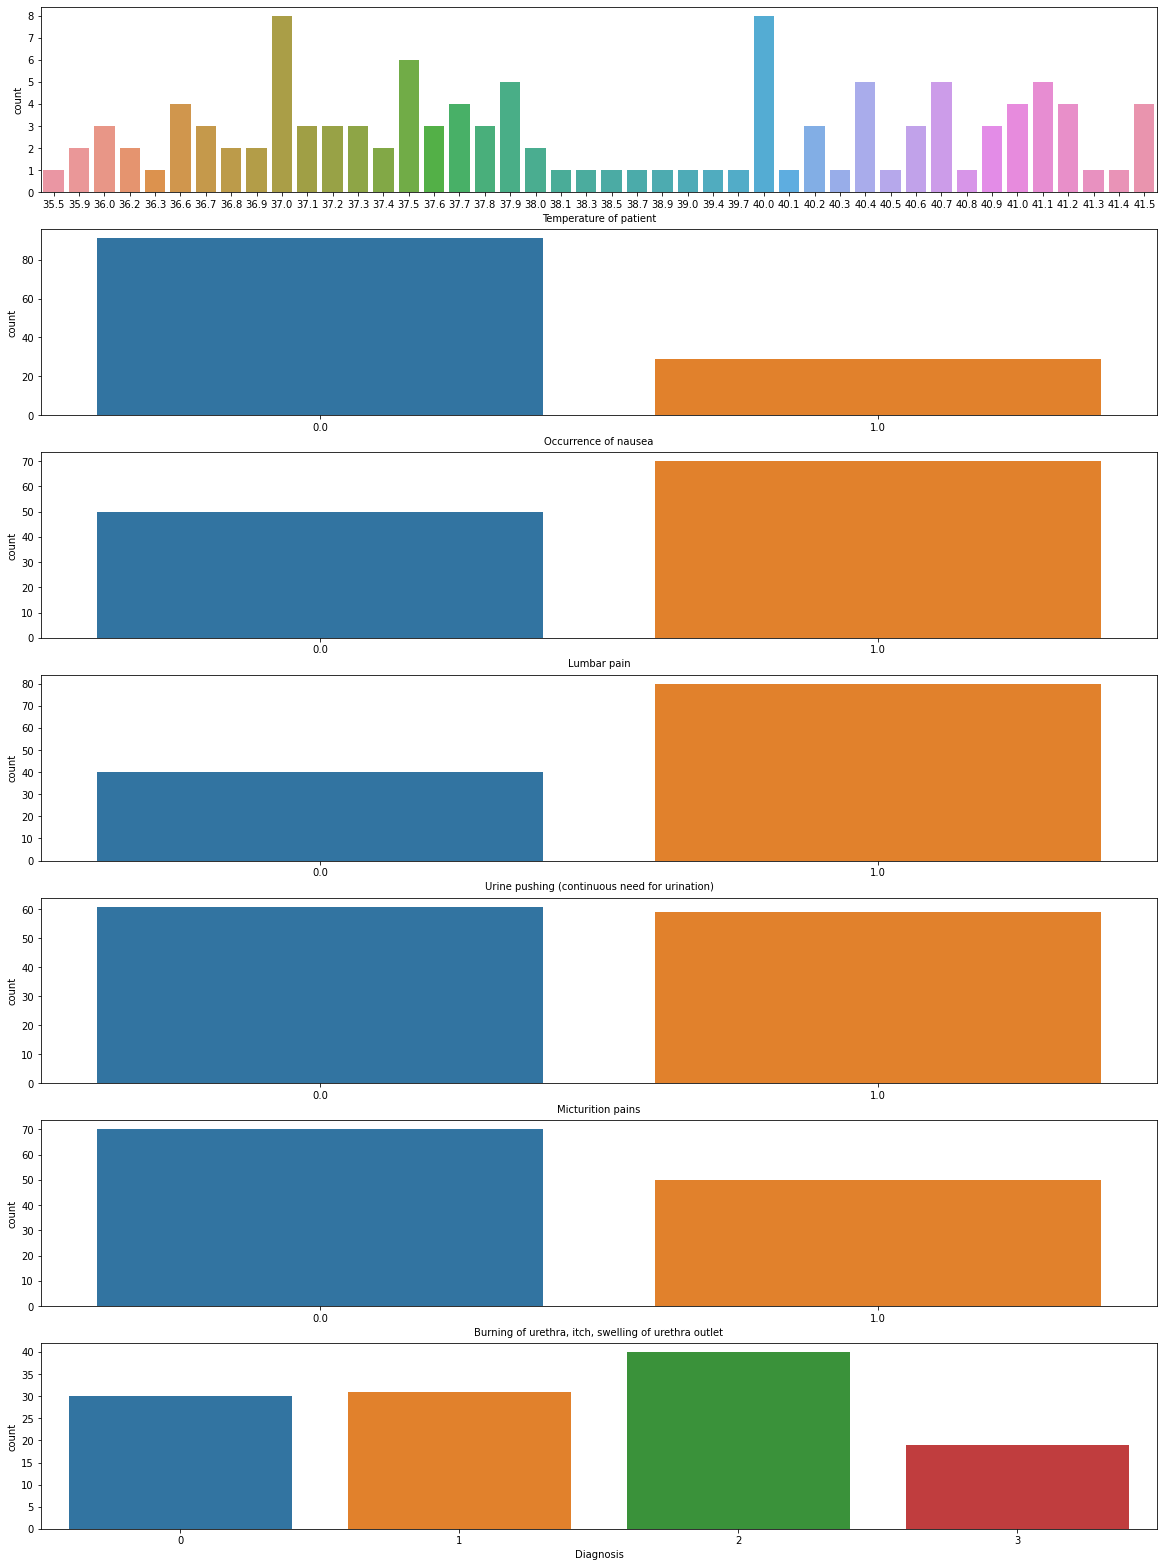

In [16]:
fig, ax =plt.subplots(len(data_df.columns),1, figsize=(20,4*len(data_df.columns)))
for i, c in enumerate(data_df.columns):
    sns.countplot(data=data_df, x=c, ax=ax[i])
fig.show()

In [17]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
data_df[['Temperature of patient']]=pd.DataFrame(scaler.fit_transform(data_df[['Temperature of patient']].astype(float)))
data_df.head()


Temperature of patient  Occurrence of nausea  Lumbar pain  \
0                0.000000                   0.0          1.0   
1                0.066667                   0.0          0.0   
2                0.066667                   0.0          1.0   
3                0.083333                   0.0          0.0   
4                0.083333                   0.0          1.0   

   Urine pushing (continuous need for urination)  Micturition pains  \
0                                            0.0                0.0   
1                                            1.0                1.0   
2                                            0.0                0.0   
3                                            1.0                1.0   
4                                            0.0                0.0   

   Burning of urethra, itch, swelling of urethra outlet Diagnosis  
0                                                0.0            0  
1                                                1.0            2  
2                                                0.0            0  
3                                                1.0            2  
4                                                0.0            0

In [18]:
from pickle import dump
import os
os.makedirs('model',exist_ok=True)
dump(scaler, open('model/scaler.pkl', 'wb'))

In [19]:
def one_hot_diagnosis(df, d):
    conditions = [
        ((df['Diagnosis']==d)),
        ((df['Diagnosis']!=d)),
    ]
    values = [1, 0]
    df['D'+str(d)] = np.select(conditions, values)
    return df

In [20]:
data_df=one_hot_diagnosis(data_df, 0)
data_df=one_hot_diagnosis(data_df, 1)
data_df=one_hot_diagnosis(data_df, 2)
data_df=one_hot_diagnosis(data_df, 3)

In [21]:
data_df.dtypes

Temperature of patient                                   float64
Occurrence of nausea                                     float64
Lumbar pain                                              float64
Urine pushing (continuous need for urination)            float64
Micturition pains                                        float64
Burning of urethra, itch, swelling of urethra outlet     float64
Diagnosis                                               category
D0                                                         int64
D1                                                         int64
D2                                                         int64
D3                                                         int64
dtype: object

<AxesSubplot:>

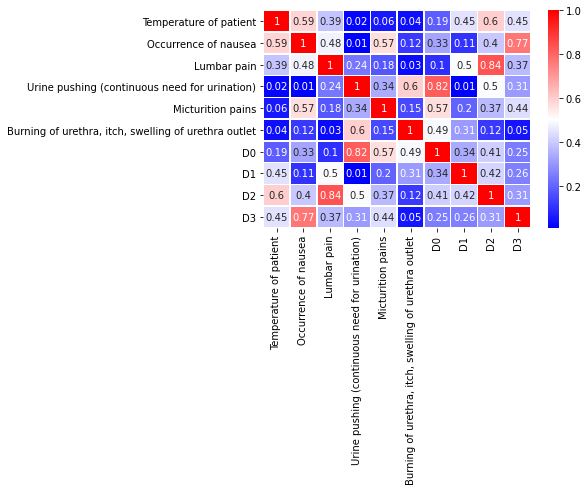

In [22]:
corr_matrix = data_df.corr().abs().round(2)
sns.heatmap(corr_matrix, annot=True, cmap='bwr', linewidths=.5)

In [23]:
test_ratio = 0.2
test_index = int(data_df.shape[0]*(1-test_ratio))
train_df = data_df[:test_index]
test_df = data_df[test_index:]
train_X, train_Y = train_df[train_df.columns[:-5]], train_df[train_df.columns[-4:]]
test_X, test_Y = test_df[test_df.columns[:-5]], test_df[test_df.columns[-4:]]

In [24]:
import torch

In [25]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device
# device = torch.device("cpu")
# device

device(type='cpu')

In [26]:
from model.model191 import LinearModelDisease
INPUT_DIM = train_X.shape[1]
HIDDEN_DIM = train_X.shape[1]*4
OUTPUT_DIM = train_Y.shape[1]
model = LinearModelDisease(INPUT_DIM, HIDDEN_DIM, OUTPUT_DIM)
model.to(device)

LinearModelDisease(
  (fc1): Linear(in_features=6, out_features=24, bias=True)
  (fc2): Linear(in_features=24, out_features=12, bias=True)
  (fc3): Linear(in_features=12, out_features=4, bias=True)
  (dropout): Dropout(p=0.3, inplace=False)
)

In [27]:
import torch.optim as optim
import torch.nn as nn
LINEAR_RATE = 0.001
optimizer = optim.Adam(model.parameters(), lr=LINEAR_RATE)
criterion = nn.CrossEntropyLoss()

In [28]:
EPOCHS = 100
for epoch in range(1, EPOCHS + 1):
    model.train()
    total_loss = 0
    for x, y in zip(train_X.values, train_Y.values):
        x = torch.tensor(x).float().to(device)
        y = torch.tensor(y).float().to(device)
        optimizer.zero_grad()
        output = model.forward(x)
        loss = criterion(output, y.argmax().view(1))
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    else:
        model.eval()
        with torch.no_grad():
            accuracy = 0
            test_loss = 0
            for x, y in zip(test_X.values, test_Y.values):
                x = torch.tensor(x).float().to(device)
                y = torch.tensor(y).float().to(device)
                output = model.forward(x)
                test_loss += criterion(output, y.argmax().view(1)).item()
                accuracy += int(y.argmax().item()==output.argmax().item())

        print(f'Epoch: {epoch}',
        f' Train Loss: {total_loss/len(train_Y.values):.2f}',
        f' Test Loss: {test_loss/len(test_Y.values):.2f}',
        f' Accuracy: {accuracy/len(test_Y.values):.2f}'
        , end='\r')

In [29]:
for x, y in zip(test_X.values, test_Y.values):
    x = torch.tensor(x).float().to(device)
    y = torch.tensor(y).float().to(device)
    log_ps = model.forward(x)
    ps = torch.exp(log_ps)
    print(f'y={y.argmax().item()} ps={ps.argmax().item()}')


y=1 ps=1
y=1 ps=1
y=3 ps=3
y=3 ps=3
y=1 ps=1
y=3 ps=3
y=0 ps=0
y=1 ps=1
y=1 ps=1
y=3 ps=3
y=3 ps=3
y=0 ps=0
y=1 ps=1
y=1 ps=1
y=3 ps=3
y=0 ps=0
y=1 ps=1
y=1 ps=1
y=3 ps=3
y=1 ps=1
y=0 ps=0
y=1 ps=1
y=1 ps=1
y=1 ps=1


In [30]:
from pickle import dump
import os
os.makedirs('model',exist_ok=True)
dump(model, open('model/model_1.9.1.pkl', 'wb'))

### Preditct

In [31]:
model

LinearModelDisease(
  (fc1): Linear(in_features=6, out_features=24, bias=True)
  (fc2): Linear(in_features=24, out_features=12, bias=True)
  (fc3): Linear(in_features=12, out_features=4, bias=True)
  (dropout): Dropout(p=0.3, inplace=False)
)

In [33]:
input_test = test_X.copy()

In [34]:
input_test['Temperature of patient']=input_test['Temperature of patient']*(41.5-35.5)+35.5
input_test

Temperature of patient  Occurrence of nausea  Lumbar pain  \
96                     40.7                   0.0          1.0   
97                     40.8                   0.0          1.0   
98                     40.9                   1.0          1.0   
99                     40.9                   1.0          1.0   
100                    40.9                   0.0          1.0   
101                    41.0                   1.0          1.0   
102                    41.0                   0.0          0.0   
103                    41.0                   1.0          1.0   
104                    41.0                   0.0          1.0   
105                    41.1                   1.0          1.0   
106                    41.1                   1.0          1.0   
107                    41.1                   0.0          0.0   
108                    41.1                   1.0          1.0   
109                    41.1                   0.0          1.0   
110                    41.2                   1.0          1.0   
111                    41.2                   0.0          0.0   
112                    41.2                   1.0          1.0   
113                    41.2                   0.0          1.0   
114                    41.3                   1.0          1.0   
115                    41.4                   0.0          1.0   
116                    41.5                   0.0          0.0   
117                    41.5                   1.0          1.0   
118                    41.5                   0.0          1.0   
119                    41.5                   0.0          1.0   

     Urine pushing (continuous need for urination)  Micturition pains  \
96                                             1.0                0.0   
97                                             1.0                0.0   
98                                             1.0                1.0   
99                                             1.0                1.0   
100                                            1.0                0.0   
101                                            1.0                1.0   
102                                            0.0                0.0   
103                                            0.0                1.0   
104                                            1.0                0.0   
105                                            1.0                1.0   
106                                            1.0                1.0   
107                                            0.0                0.0   
108                                            0.0                1.0   
109                                            1.0                0.0   
110                                            1.0                1.0   
111                                            0.0                0.0   
112                                            0.0                1.0   
113                                            1.0                0.0   
114                                            1.0                1.0   
115                                            1.0                0.0   
116                                            0.0                0.0   
117                                            0.0                1.0   
118                                            1.0                0.0   
119                                            1.0                0.0   

     Burning of urethra, itch, swelling of urethra outlet  
96                                                 1.0     
97                                                 1.0     
98                                                 0.0     
99                                                 0.0     
100                                                1.0     
101                                                1.0     
102                                                0.0     
103                                             

In [49]:
input_data = input_test.values[0]

In [50]:
input_data

array([40.7,  0. ,  1. ,  1. ,  0. ,  1. ])

In [36]:
min_t = 35.5

In [37]:
max_t = 41.5

In [52]:
temp_pred = (input_data[0]-min_t)/(max_t-min_t)

In [53]:
temp_pred

0.8666666666666671

In [57]:
temp_pred = temp_pred.reshape(1)
temp_pred

array([0.86666667])

In [56]:
input_data[1:]

array([0., 1., 1., 0., 1.])

In [59]:
x_input = np.concatenate((temp_pred, input_data[1:]), axis=0)
x_input

array([0.86666667, 0.        , 1.        , 1.        , 0.        ,
       1.        ])

In [41]:
torch.__version__

'1.9.1+cu102'

In [60]:
data = torch.from_numpy(x_input).float()
data

tensor([0.8667, 0.0000, 1.0000, 1.0000, 0.0000, 1.0000])

In [61]:
data.shape

torch.Size([6])

In [66]:
data

tensor([0.8667, 0.0000, 1.0000, 1.0000, 0.0000, 1.0000])

In [67]:
out_pred = model.forward(data)

In [68]:
out_pred

tensor([[5.0574e-04, 9.9848e-01, 5.0574e-04, 5.0574e-04]],
       grad_fn=<SoftmaxBackward>)